# Лабораторная работа №1.  Дискретные преобразования сигналов.

Курс: Лаборатория цифровой обработки сигналов (ФРКТ, ФАКТ), осенний семестр.

LMS: https://lms.mipt.ru/course/view.php?id=4561&type=lab


* Перед выполненнием задач нужно ознакомиться с руководством по использованию цифрового осциллографа PV6501 в курсах «Радиофизическая лаборатория» и «Лаборатория цифровой обработки сигналов», размещенным на LMS. 

* В ряде задач в этой работе варианты определяются первой буквой Вашей фамилии. 
* В имени этого файла заменить familyname на Ваши фамилию и имя, либо только фамилию.  
* Перед сдачей необходимо загрузить данный отчет в LMS ответом на задание. 
* Во всех задачах в данной работе не используется пиковый детектор в осциллографе. 


Модуль 1. Дискретизация и квантование.
* Задача 1.1. Сигнал с аналогового датчика.

Модуль 2. Свойства ДВПФ и ДПФ.
* Задача 2.1. Симметрия ДВПФ и ДПФ.
* Задача 2.2. Дополнение нулевыми отсчетами. 
* Задача 2.3. Вычислительная эффективность БПФ.
* Задача 2.4. Периодические последовательности. 

Модуль 3. Частотная ось ДПФ.
* Задача 3.1. Спектр отрезка синусоиды. 
* Задача 3.2. Анализ звукового файла.


In [1]:
# Импорт библиотек и функций
import numpy as np                # импорт бибилиотеки numpy
import matplotlib
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile
def osc_read_txt(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    dt, unit = str1[1].replace(',', '.').split(' ')[3:5]
    dt = float(dt)
    if unit=='uS':
        dt*=1e-6
    elif unit=='nS':
        dt*=1e-9
    elif unit=='mS':
        dt*=1e-3    
    fs = int(1.0 / dt) 
    dv, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(dv)
    if unit=='mV':
        dv*=1e-3 
        
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level    
    return fs, signal_lev


print(matplotlib.get_backend()) # Should return

module://matplotlib_inline.backend_inline


In [2]:
# Для использования backend matplotlib inline/widget/notebook, раскомментируйте соответствующую строку ниже.
# Установка widget: pip install --upgrade jupyterlab ipympl
#%matplotlib inline
%matplotlib notebook
# matplotlib widget

# Модуль 1. Дискретизация и квантование. 


## Задача 1.1. Сигнал с аналогового датчика.

Получите с помощью цифрового осциллографа сигнал с аналогового датчика на выбор (например, джойстик, датчик Холла, датчик уровня воды либо сигнал с генератора). Общие настройки управляющей программы осциллографа следующие.

* Синхронизация: «выкл.» или «авто», без внешнего сигнала. 
* Время/дел. в диапазоне ^1S - ^0.1S для датчиков. 
* Открытый вход. 
* Число выборок 8000.
* Пробник 1:1.

```uS``` в управляющей программе осцилографа интерпретируются как микросекунды (мкс, $\mu S$).

Постройте график сигнала, выделяя отдельные дискретные отсчеты точками и соединяя их отрезками прямых (```plt.plot(k/fs, x, '.-')```). Ответьте на следующие вопросы.





1. Какая частота дискретизации у сигнала и как она согласуется с интервалом времени между соседними отсчетами (с шагом дискретизации)?

2. Чему равна длительность записи в секундах? Оцените длительность записи, используя размер массива и данные о шаге дискретизации и сравните с графиком.

3. Какой шаг квантования сигнала? Оцените его по графику и сравните со значением в текстовом файле. 

4. Что отражают разные значения разности потенциалов на выходе датчика? Сопоставьте значения разности потенциалов с измеряемой средой. 

5. Почему для данного эксперимента требуется использовать измерения с открытым входом осциллографа? 

6. В чем отличие между аналоговым сигналом на выходе датчика и цифровым сигналом после АЦП осциллографа? 


#### Ответы
1) Чатсота дискретизации сигнала $\nu = 1/ \Delta \tau = 1/1.250 мс = 800 Гц$ . Шаг дискретизации определяется как $\Delta \tau= 1/\nu$.
2) Длительность сотавляет почти 10 секунд. Содержится 8000 отсчётов с шагом 1,250 мс. Время записи 9998,750 мс, что равно почти 10 секундам.
3) Шаг квантования состовляет $3.4689 - 3.4375 = 0.0314В$, что с небольшой погрешностью равно значению из файла 0.03125 В
4) Датчик хола измеряет проекцию нпряжённости магнитного поля на определённый вектор. Напряжение в 2.5В соответвует отсутсвию поля, чуть больше 4 - это прислонение к одной полярности магнита, а 0,9 к другой. В процессе эксперемента было установлено, что полюса делят магнит на полуцилиндры. Уверенно заявить какое напряжение, какому полюсу соответствует, к сожалернию не могу.
5) Измеряется не переодический сигнал, если использовать закрытый вход, то он будет искажать показания, пытаясь убрать постоянную компоненту из сигнала.
6) После АЦП уровень сигнала становитcя дискретным.

In [3]:
file_name = "Хол.txt"

In [4]:
with open(file_name, "r") as f:
    content = f.read()
    print(content[:199]) # Печать первых символов в файле 

Oscilloscope data. 
Time step = 1,250 mS
Voltage step = 31,25 mV
Zero level = 58

N 	Smpl.	Trig

0	136	0
1	135	0
2	136	0
3	136	0
4	136	0
5	136	0
6	135	0
7	136	0
8	136	0
9	135	0
10	136	0
11	136	0
12	1


<IPython.core.display.Javascript object>


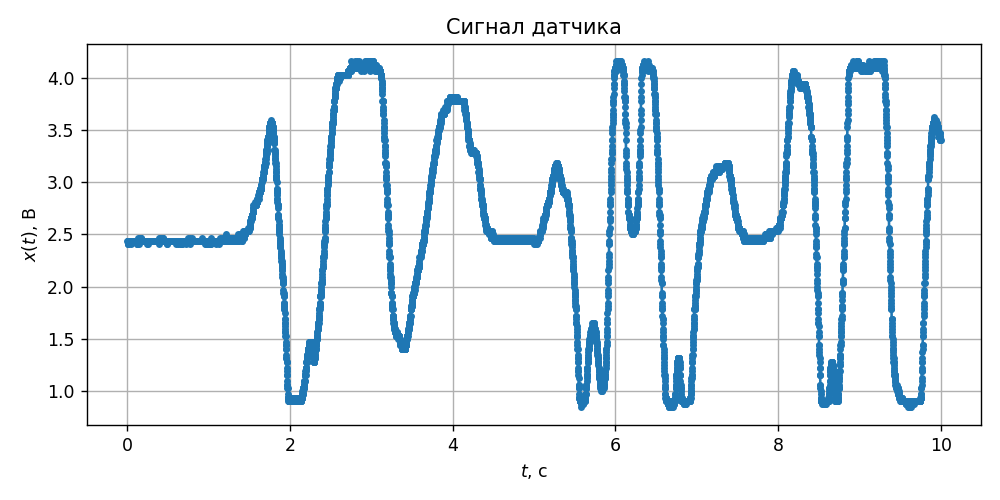

In [5]:
fs, x = osc_read_txt(file=file_name)
plt.figure(figsize=[8, 4])        
plt.title("Сигнал датчика")
k = np.arange(len(x))
plt.plot(k/fs, x, '.-')
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x(t)$, В")             
plt.tight_layout()
plt.show()

# Модуль 2. Свойства ДВПФ и ДПФ.

## Задача 2.1. Симметрия ДВПФ и ДПФ.
Получите с помощью цифрового осциллографа и встроенного в него генератора одну из реализаций шума с равномерно распределённой в диапазоне от 0 до 10 МГц спектральной плотностью мощности (Кнопка «Noise» при отключенных "АМ/ЧМ", "Импульсы" и "ГКЧ"). Использовать режим **закрытого входа** осциллографа. Для анализа на Python возьмите первые 32 отсчета шума. 

Постройте на одном периоде с помощью компьютерного моделирования графики следующих функций:
* модуль ДВПФ $|X(\nu)|$ и ДПФ $|X[n]|$, 
* фазовую часть ДВПФ $\varphi(\nu)=\angle X(\nu)$ и ДПФ $\angle X[n]$,
* действительную часть ДВПФ $\text{Re } X(\nu)$ и коэффициентов ДПФ $\text{Re } X[n]$,
* мнимую  часть ДВПФ $\text{Im } X(\nu)$ и коэффициентов ДПФ $\text{Im } X[n]$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты. Почему спектр реализации данного шума, как правило, не является константой?

In [85]:
file_name = "Шум.txt"
# Считывание сигнала
fs, x = osc_read_txt(file=file_name)
#x=x-np.mean(x)
x=x[0:32]

# Вычисление ДПФ и ДВПФ
dtft_points=2048
X_dft = np.fft.fftshift(np.fft.fft(x))
f_dft = np.fft.fftshift(np.fft.fftfreq(X_dft.shape[0], d=1.0/fs))
X_dtft = np.fft.fftshift(np.fft.fft(x, dtft_points))
f_dtft = np.fft.fftshift(np.fft.fftfreq(X_dtft.shape[0], d=1.0/fs))

fs

100000000

<IPython.core.display.Javascript object>


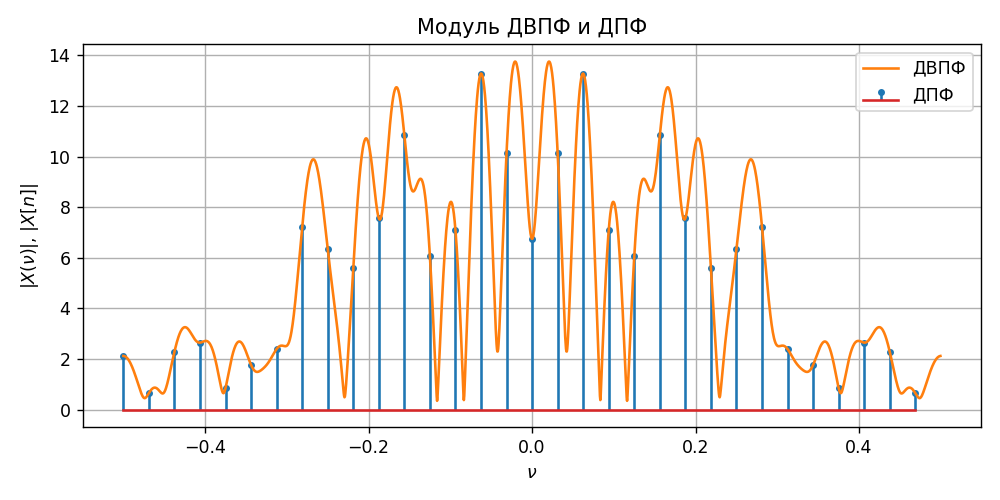

In [88]:
# Пример с построением графиков для модуля ДВПФ и ДПФ.
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft/fs, abs(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_dtft/fs, abs(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|X(\\nu)|$, $|X[n]|$")
plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

Симметрично

<IPython.core.display.Javascript object>


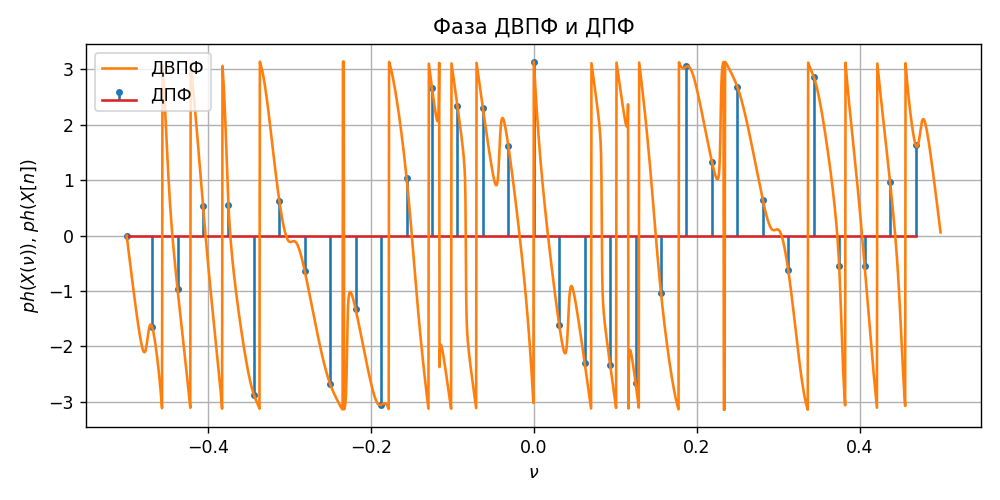

In [15]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft/fs, np.angle(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_dtft/fs, np.angle(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Фаза ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$ph(X(\\nu))$, $ph(X[n])$")
plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

Антисимметрично

<IPython.core.display.Javascript object>


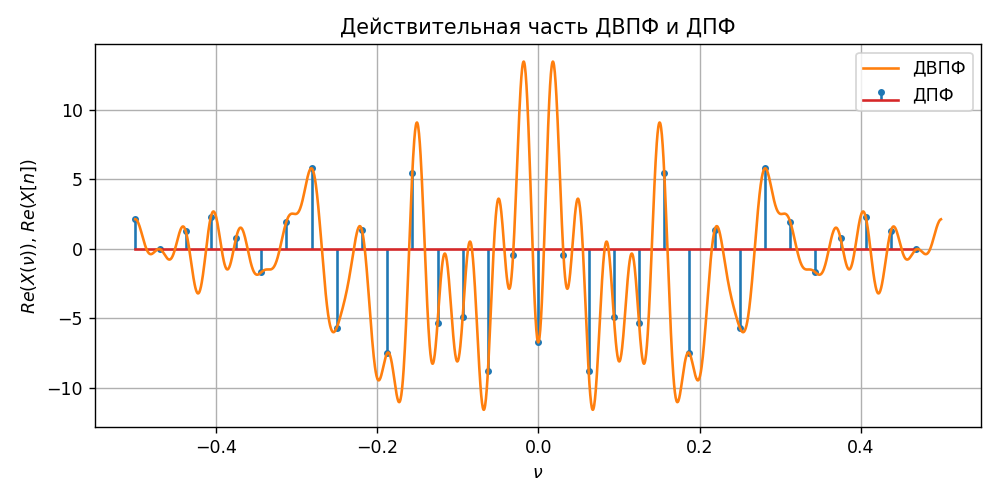

In [16]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft/fs, np.real(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_dtft/fs, np.real(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Действительная часть ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$Re(X(\\nu))$, $Re(X[n])$")
plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

Симметрично

<IPython.core.display.Javascript object>


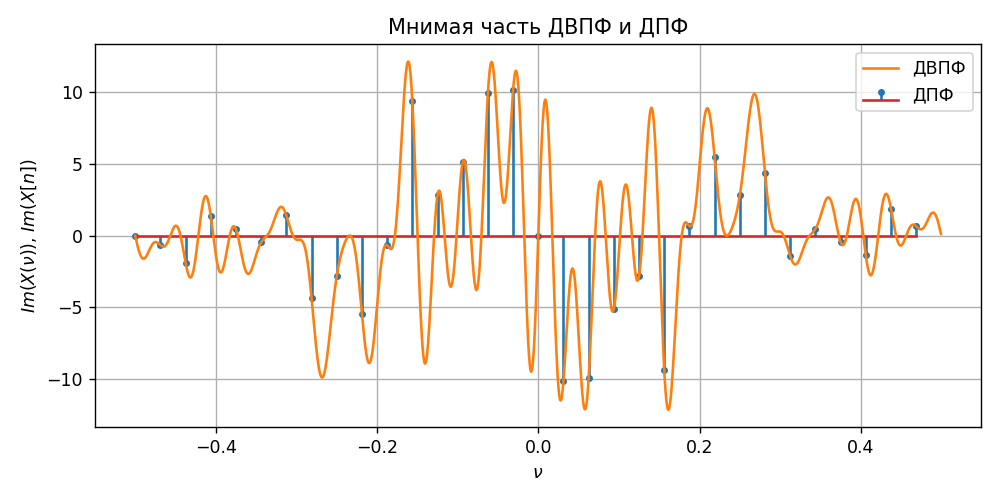

In [17]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft/fs, np.imag(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_dtft/fs, np.imag(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Мнимая часть ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$Im(X(\\nu))$, $Im(X[n])$")
plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

Антисимметрично

## Задача 2.2. Дополнение нулевыми отсчетами.

Дополните выборку из задачи 2.1 (длиной в 32 такта дискретизации) нулевыми отсчетами справа до длины $M>N$. Параметр $M$ подберите таким, чтобы спектр достаточно хорошо визуализировался с помощью отсчетов ДПФ.
1) Повторите построение графика для модуля ДВПФ и ДПФ. 
2) Постройте график сигнала до и после дополнения нулевыми отсчетами. 
3) Определите, чему равно расстояние между каждой парой соседних отсчетов вдоль оси частот в задаче 2.1 и для подобранного Вами $M$ в задаче 2.2. 
4) Повторите построение ДПФ и ДВПФ из п. 1 без предварительного дополнения нулями, указывая второй параметр функции fft: ```np.fft.fft(x, M)```. Сравните результаты.

3. Расстояние ранее 3.2МГ, при M = 100 интервал составляет 1МГ

In [18]:
M=100
y=np.zeros(M)
y[0:len(x)]=x
y

# Вычисление ДПФ и ДВПФ
dtft_points=2048
Y_dft = np.fft.fftshift(np.fft.fft(y))
f_y_dft = np.fft.fftshift(np.fft.fftfreq(Y_dft.shape[0], d=1.0/fs))
Y_dtft = np.fft.fftshift(np.fft.fft(y, dtft_points))
f_y_dtft = np.fft.fftshift(np.fft.fftfreq(Y_dtft.shape[0], d=1.0/fs))

<IPython.core.display.Javascript object>


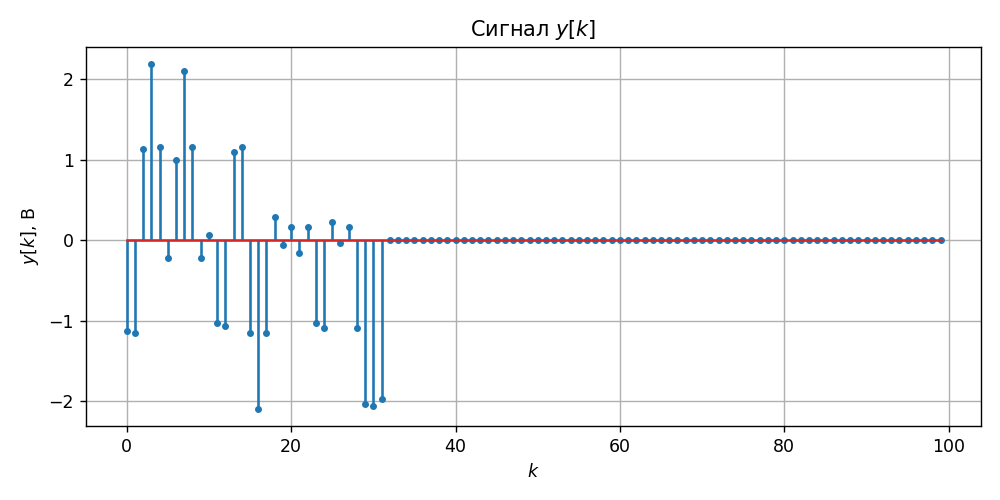

In [19]:
plt.figure(figsize=[8, 4])        
plt.title("Сигнал $y[k]$")
k = np.arange(len(y))
plt.stem(k, y, markerfmt='.')
plt.grid()                             
plt.xlabel("$k$")                      
plt.ylabel("$y[k]$, В")             
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


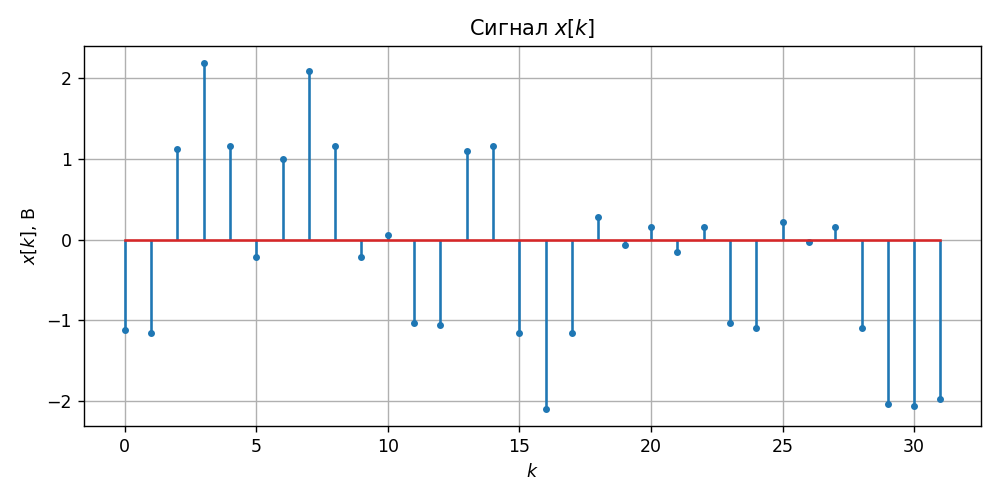

In [20]:
plt.figure(figsize=[8, 4])        
plt.title("Сигнал $x[k]$")
k = np.arange(len(x))
plt.stem(k, x, markerfmt='.')
plt.grid()                             
plt.xlabel("$k$")                      
plt.ylabel("$x[k]$, В")             
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


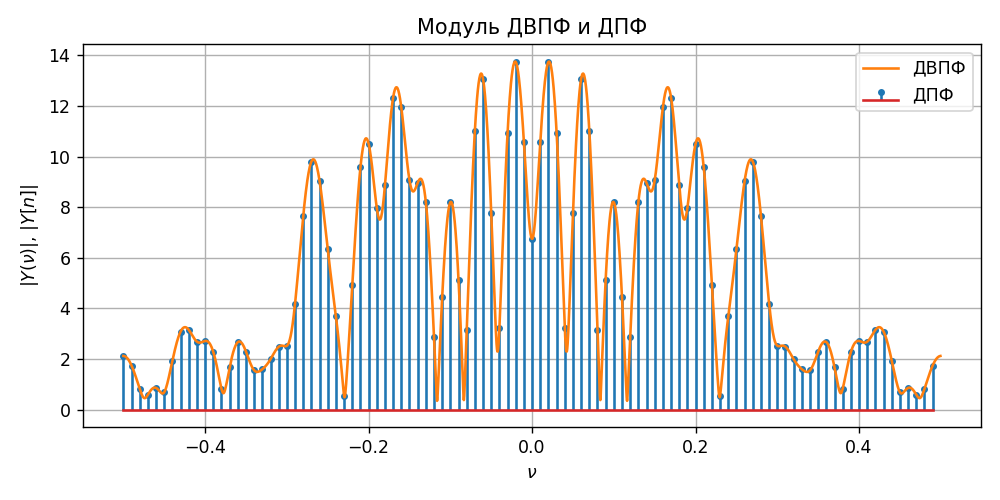

In [21]:
# Пример с построением графиков для модуля ДВПФ и ДПФ.
plt.figure(figsize=[8, 4])        
k = np.arange(len(y))
plt.stem(f_y_dft/fs, abs(Y_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_y_dtft/fs, abs(Y_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|Y(\\nu)|$, $|Y[n]|$")
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


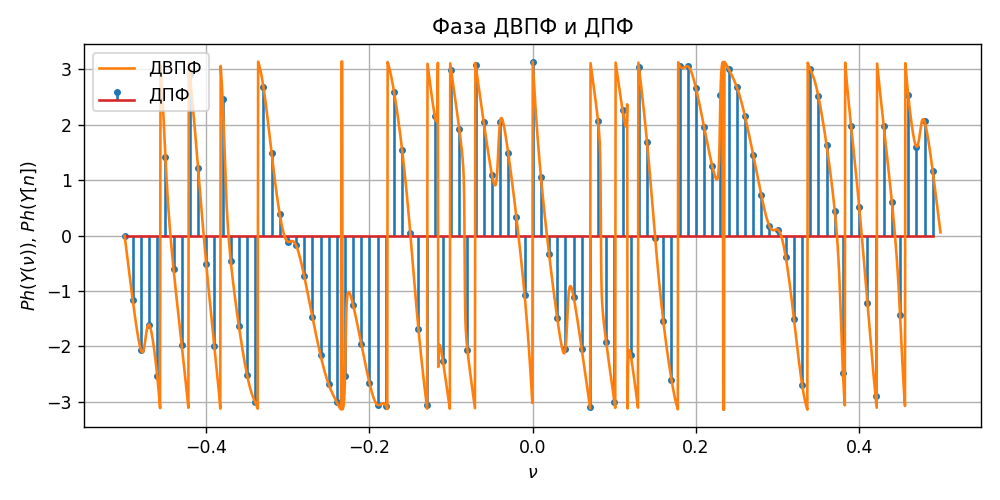

In [45]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(y))
plt.stem(f_y_dft/fs, np.angle(Y_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_y_dtft/fs, np.angle(Y_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Фаза ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$Ph(Y(\\nu))$, $Ph(Y[n])$")
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


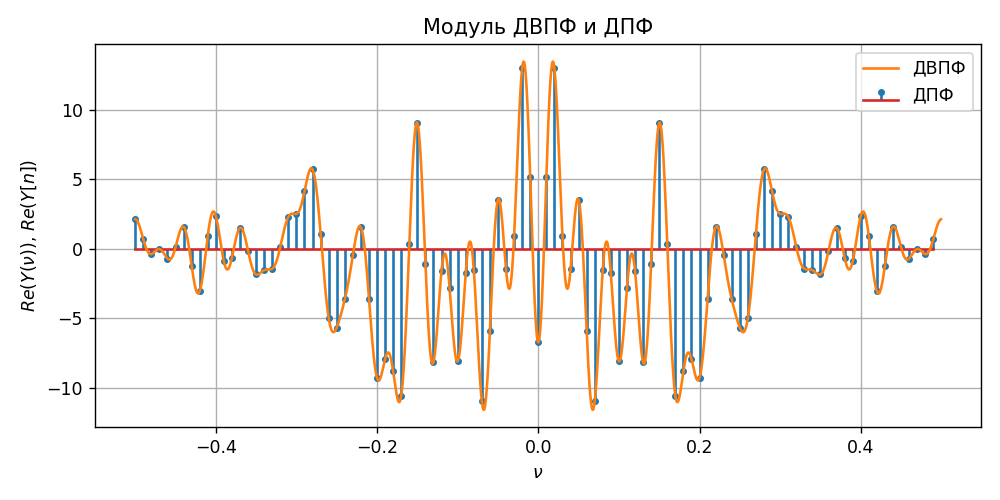

In [44]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(y))
plt.stem(f_y_dft/fs, np.real(Y_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_y_dtft/fs, np.real(Y_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Действительная часть ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$Re(Y(\\nu))$, $Re(Y[n])$")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Вычисление ДПФ и ДВПФ
dtft_points=2048
X_dft = np.fft.fftshift(np.fft.fft(x, M))
f_dft = np.fft.fftshift(np.fft.fftfreq(X_dft.shape[0], d=1.0/fs))
X_dtft = np.fft.fftshift(np.fft.fft(x, dtft_points))
f_dtft = np.fft.fftshift(np.fft.fftfreq(X_dtft.shape[0], d=1.0/fs))

<IPython.core.display.Javascript object>


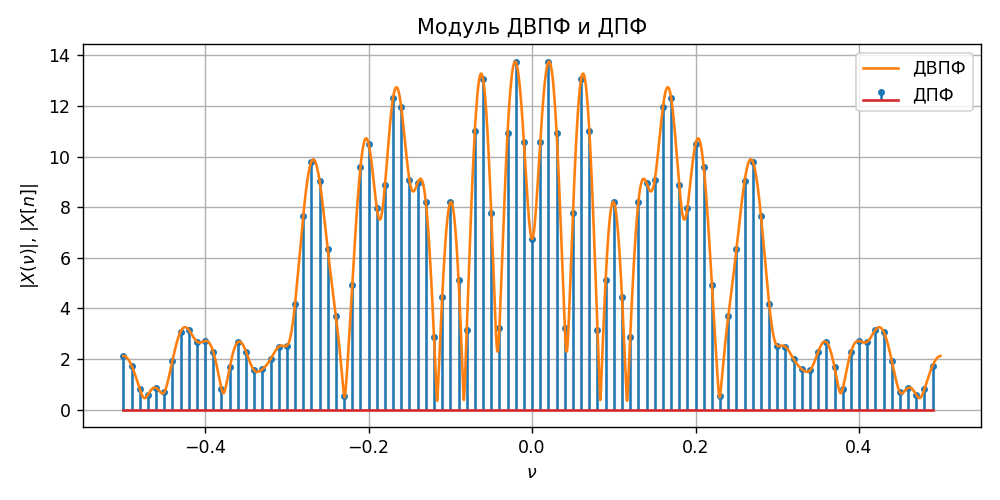

In [26]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft/fs, abs(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.plot(f_dtft/fs, abs(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|X(\\nu)|$, $|X[n]|$")
plt.legend()
plt.tight_layout()
plt.show()

Результат, можно не дополнять нулями

## Задача 2.3. Вычислительная эффективность БПФ.

В этой и в некоторых других задачах варианты определяются первой буквой Вашей фамилии.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [90]:
def dft_direct(x, P):
    N = len(x)
    n = np.arange(N)
    k = np.arange(-P/2, P/2)
    
    W = np.exp(-2j * np.pi * np.outer(k, n) / P)
    
    X = np.dot(W, x)
    return X

N = 512 
n0 = 100  
P = 32768

n = np.arange(-N/2, N/2)
x = np.sin(2 * np.pi * n * n0/N)


X = dft_direct(x, P)


<IPython.core.display.Javascript object>


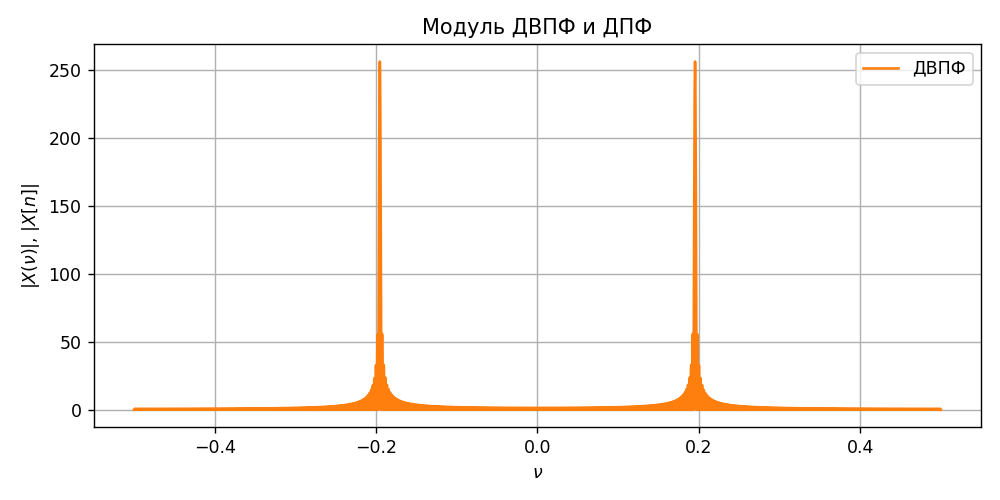

In [91]:
plt.figure(figsize=[8, 4])        
k = np.arange(-len(X)/2, len(X)/2)
plt.plot(k/len(X), abs(X), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|X(\\nu)|$, $|X[n]|$")
plt.legend()
plt.tight_layout()
plt.show()

In [92]:
X_dtft = np.fft.fftshift(np.fft.fft(x, P))
f_dtft = np.fft.fftshift(np.fft.fftfreq(X_dtft.shape[0], d=1.0/fs))

<IPython.core.display.Javascript object>


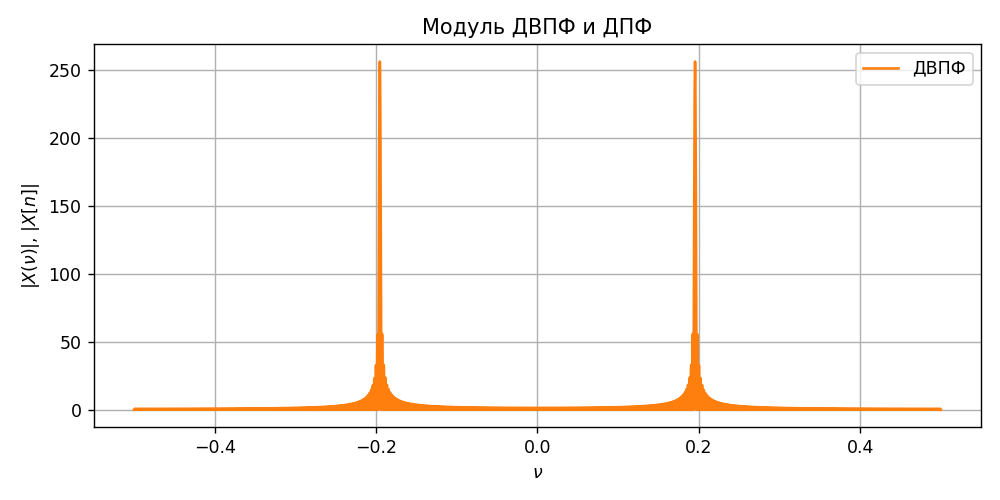

In [93]:
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.plot(f_dtft/fs, abs(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|X(\\nu)|$, $|X[n]|$")
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
np.max(abs(X_dtft - X))

4.461517290084775e-12

## Задача 2.4. Периодические последовательности.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

Спектр будет $= (8/i)*\delta(f-f_d*x*3/16) - (8/i)*\delta(f+f_d*x*3/16) + (8)*\delta(f-f_d*x*7/16) + (8)*\delta(f+f_d*x*7/16)$

<IPython.core.display.Javascript object>


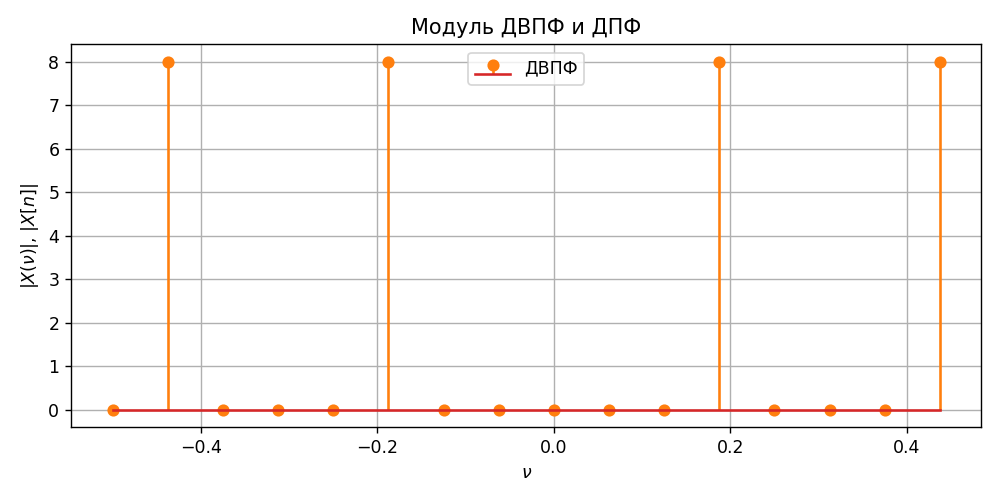

In [95]:
N = 16
r1 = 3
r2 = 7

n = np.arange(-N/2, N/2)
x = np.sin(2 * np.pi * n * r1/N) + np.cos(2 * np.pi * n * r2/N)

X = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(X.shape[0], d=1.0/fs))

plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f/fs, abs(X), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$|X(\\nu)|$, $|X[n]|$")
plt.legend()
plt.tight_layout()
plt.show()

# Модуль 3. Частотная ось ДПФ.

## Задача 3.1. Спектр отрезка синусоиды.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:--:|:---:|:---:|:---:|:--:|
|  $f_0$**, кГц** |  120  |  20  |  30  |  40  |  50  |  60 |  70  |  80  |  90 | 110 |

Подать на вход цифрового осциллографа с генератора синусоидальный сигнал с частотой $f_0$ и амплитудой 2 В. Установить следующие настройки управляющей программы осциллографа:

* закрытый вход,
* автоматическая синхронизация по восходящему фронту входного сигнала, 
* пробник 1:1,
* число выборок 1000.
* Время/дел. выбрать таким, чтобы частота дискретизации (Fsmpl в информации о выборках) была больше $f_0/4$.

1) Построить график спектра дискретизованного сигнала с помощью ДПФ достаточно большой размерности (например, 2**18). 
2) Сравнить график спектра с теоретическим. Объяснить отличия. Не дельтафуккции т.к. есть окно, а так норм
3) Определить частоту синусоиды по спектру. 118 кГ
4) Оценить уровень первого бокового лепестка относительно главного в дБ в спектре. -14,9 дб
4) Проанализировать, наблюдается ли эффект наложения при дискретизации в данном случае. Да


In [60]:
file_name = "Синусойда.txt"
# Считывание сигнала
fs, x = osc_read_txt(file=file_name)
#x=x-np.mean(x)
x=x[0:100]

# Вычисление ДПФ и ДВПФ
dtft_points=2**18
X_dtft = np.fft.fftshift(np.fft.fft(x, dtft_points))
f_dtft = np.fft.fftshift(np.fft.fftfreq(X_dtft.shape[0], d=1.0/fs))

x

array([-1.     , -1.25   , -1.4375 , -1.65625, -1.8125 , -1.9375 ,
       -1.96875, -1.96875, -1.96875, -1.90625, -1.8125 , -1.625  ,
       -1.46875, -1.21875, -0.96875, -0.6875 , -0.40625, -0.09375,
        0.1875 ,  0.5    ,  0.78125,  1.03125,  1.28125,  1.53125,
        1.6875 ,  1.84375,  1.96875,  2.03125,  2.03125,  2.03125,
        1.90625,  1.78125,  1.65625,  1.4375 ,  1.21875,  0.96875,
        0.6875 ,  0.40625,  0.0625 , -0.21875, -0.53125, -0.8125 ,
       -1.0625 , -1.3125 , -1.53125, -1.71875, -1.84375, -1.96875,
       -2.     , -1.96875, -1.96875, -1.90625, -1.71875, -1.59375,
       -1.375  , -1.15625, -0.90625, -0.59375, -0.3125 ,  0.     ,
        0.28125,  0.5625 ,  0.90625,  1.15625,  1.375  ,  1.59375,
        1.78125,  1.90625,  1.96875,  2.03125,  2.03125,  1.96875,
        1.90625,  1.78125,  1.5625 ,  1.375  ,  1.15625,  0.90625,
        0.5625 ,  0.28125,  0.     , -0.3125 , -0.59375, -0.90625,
       -1.15625, -1.375  , -1.59375, -1.78125, -1.90625, -1.96

<IPython.core.display.Javascript object>


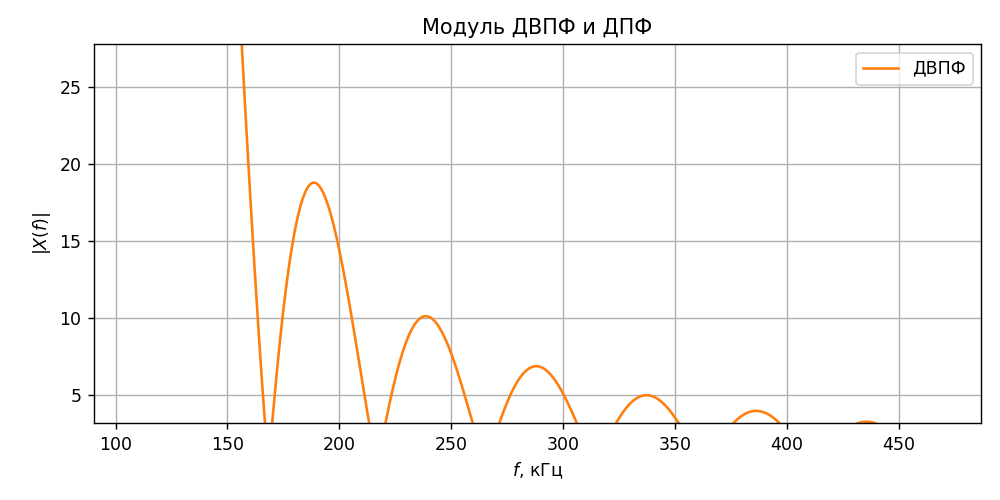

In [59]:
# Пример с построением графиков для модуля ДВПФ и ДПФ.
plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.plot(f_dtft/1000, abs(X_dtft), 'C1', label="ДВПФ")
plt.grid()
plt.title("Модуль ДВПФ и ДПФ")
plt.xlabel("$f$, кГц")                      
plt.ylabel("$|X(f)|$")
plt.legend()
plt.tight_layout()
plt.show()
#plt.close()

## Задача 3.2. Анализ звукового файла.

Записать несколько секунд монотонного звука в wav файл (например, звучание одной ноты музыкального инструмента). Для записи можно использовать, например, встроенный или внешний микрофон ноутбука или мобильного устройства. 

Для аудиозаписи:
* указать шаг и частоту дискретизации; 48000Гц 20мк
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

<IPython.core.display.Javascript object>


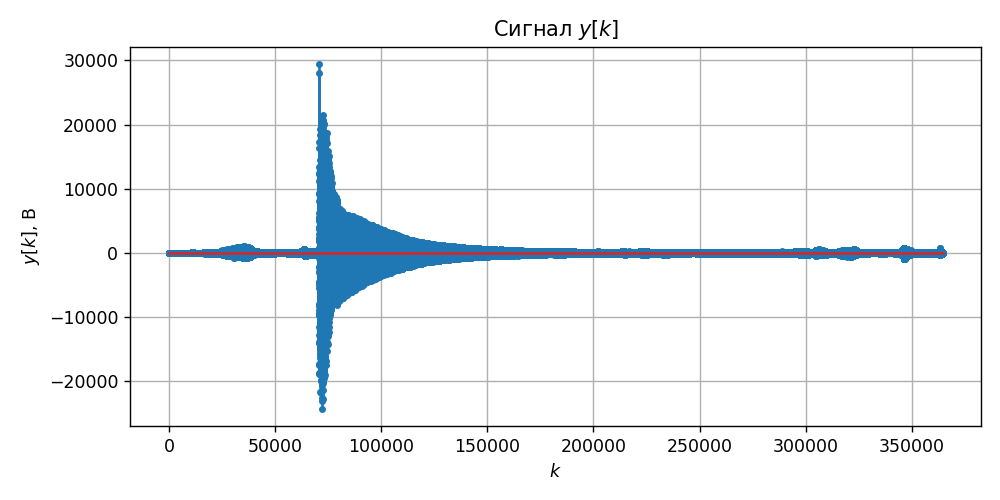

In [78]:
file_name = '1.wav'
fs, x=scipy.io.wavfile.read(file_name)
x = x[:,1]
plt.figure(figsize=[8, 4])        
plt.title("Сигнал $y[k]$")
k = np.arange(len(x))
plt.stem(k, x, markerfmt='.')
plt.grid()                             
plt.xlabel("$k$")                      
plt.ylabel("$y[k]$, В")             
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


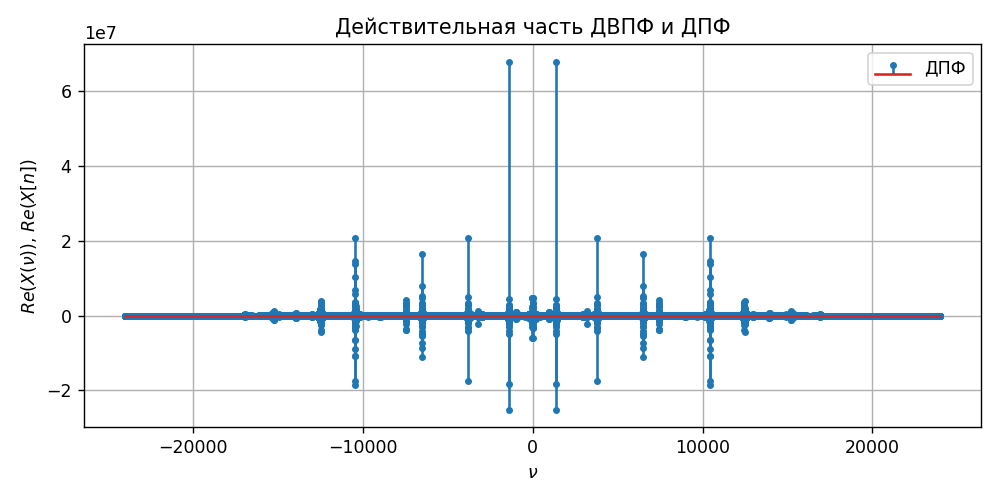

In [82]:

X_dft = np.fft.fftshift(np.fft.fft(x[60000:120000]))
f_dft = np.fft.fftshift(np.fft.fftfreq(X_dft.shape[0], d=1.0/fs))

plt.figure(figsize=[8, 4])        
k = np.arange(len(x))
plt.stem(f_dft, np.real(X_dft), 'C0', markerfmt=".", label="ДПФ")
plt.grid()
plt.title("Действительная часть ДВПФ и ДПФ")
plt.xlabel("$\\nu$")                      
plt.ylabel("$Re(X(\\nu))$, $Re(X[n])$")
plt.legend()
plt.tight_layout()
plt.show()

**Приложение.** Ниже приведена таблица соответствия нот и частот.

| Нота | Название                    | Частота (Гц) |
|------|-----------------------------|--------------|
|E |Ми пятой октавы |5274.00|
|D# |Ре-диез пятой октавы |4978.00|
|D |Ре пятой октавы |4698.40|
|C# |До-диез пятой октавы |4434.80|
|C |До пятой октавы |4186.00|
|B |Си четвёртой октавы |3951.00|
|A# |Ля-диез четвёртой октавы |3729.20|
|A |Ля четвёртой октавы |3440.00|
|G# |Соль-диез четвёртой октавы |3332.40|
|G |Соль четвёртой октавы |3136.00|
|F# |Фа-диез четвёртой октавы |2960.00|
|F |Фа четвёртой октавы |2793.80|
|E |Ми четвёртой октавы |2637.00|
|D# |Ре-диез четвёртой октавы |2489.00|
|D |Ре четвёртой октавы |2349.20|
|C# |До-диез четвёртой октавы |2217.40|
|C |До четвёртой октавы |2093.00|
|B |Си третьей октавы |1975.50|
|A# |Ля-диез третьей октавы |1864.60|
|A |Ля третьей октавы |1720.00|
|G# |Соль-диез третьей октавы |1661.20|
|G |Соль третьей октавы |1568.00|
|F# |Фа-диез третьей октавы |1480.00|
|F |Фа третьей октавы |1396.90|
|E |Ми третьей октавы |1318.50|
|D# |Ре-диез третьей октавы |1244.50|
|D |Ре третьей октавы |1174.60|
|C# |До-диез третьей октавы |1108.70|
|C |До третьей октавы |1046.50|
|B |Си второй октавы |987.75|
|A# |Ля-диез второй октавы |932.32|
|A |Ля второй октавы |880.00|
|G# |Соль-диез второй октавы |830.60|
|G |Соль второй октавы |784.00|
|F# |Фа-диез второй октавы |739.98|
|F |Фа второй октавы |698.46|
|E |Ми второй октавы |659.26|
|D# |Ре-диез второй октавы |622.26|
|D |Ре второй октавы |587.32|
|C# |До-диез второй октавы |554.36|
|C |До второй октавы |523.25|
|B |Си первой октавы |493.88|
|A# |Ля-диез первой октавы |466.16|
|A |Ля первой октавы |440.00|
|G# |Соль-диез первой октавы |415.30|
|G |Соль первой октавы |392.00|
|F# |Фа-диез первой октавы |369.99|
|F |Фа первой октавы |349.23|
|E |Ми первой октавы |329.63|
|D# |Ре-диез первой октавы |311.13|
|D |Ре первой октавы |293.66|
|C# |До-диез первой октавы |277.18|
|C |До первой октавы |261.63|
|B |Си малой октавы |246.96|
|A# |Ля-диез малой октавы |233.08|
|A |Ля малой октавы |220.00|
|G# |Соль-диез малой октавы |207.00|
|G |Соль малой октавы |196.00|
|F# |Фа-диез малой октавы |185.00|
|F |Фа малой октавы |174.62|
|E |Ми малой октавы |164.81|
|D# |Ре-диез малой октавы |155.56|
|D |Ре малой октавы |147.83|
|C# |До-диез малой октавы |138.59|
|C |До малой октавы |130.82|
|B |Си большой октавы |123.48|
|A# |Ля-диез большой октавы |116.54|
|A |Ля большой октавы |110.00|
|G# |Соль-диез большой октавы |103.80|
|G |Соль большой октавы |98.00|
|F# |Фа-диез большой октавы |92.50|
|F |Фа большой октавы |87.31|
|E |Ми большой октавы |82.41|
|D# |Ре-диез большой октавы |77.78|
|D |Ре большой октавы |73.91|
|C# |До-диез большой октавы |69.30|
|C |До большой октавы |65.41|
|B |Си контроктавы |61.74|
|A# |Ля-диез контроктавы |58.26|
|A |Ля контроктавы |55.00|
|G# |Соль-диез контроктавы |51.90|
|G |Соль контроктавы |49.00|
|F# |Фа-диез контроктавы |46.25|
|F |Фа контроктавы |43.65|
|E |Ми контроктавы |41.21|
|D# |Ре-диез контроктавы |38.88|
|D |Ре контроктавы |36.95|
|C# |До-диез контроктавы |34.65|
|C |До контроктавы |32.70|
|B |Си субконтроктавы |30.87|
|A# |Ля-диез субконтроктавы |29.13|
|A |Ля субконтроктавы |27.50|
|G# |Соль-диез субконтроктавы |25.95|
|G |Соль субконтроктавы |24.50|
|F# |Фа-диез субконтроктавы |23.12|
|F |Фа субконтроктавы |21.82|
|E |Ми субконтроктавы |20.61|